In [1]:
import os 
import PIL
import glob

import tensorflow_datasets as tfds
import tensorflow as tf
import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(len(tfds.list_builders()))

1276


In [3]:
print(tfds.list_builders()[:5])

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset']


In [4]:
malaria = tfds.builder('malaria')

In [5]:
print(malaria.info.features)

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
})


In [37]:
print(malaria.info.features['image'].shape)

(None, None, 3)


In [36]:
print(malaria.info.features['label'].names)

['parasitized', 'uninfected']


In [39]:
print(malaria.info.splits)

{Split('train'): <SplitInfo num_examples=27558, num_shards=4>}


In [41]:
print(list(malaria.info.splits.keys()))

[Split('train')]


In [42]:
print(malaria.info.splits['train'].num_examples)
print(malaria.info.splits['train'].filenames)
print(malaria.info.splits['train'].num_shards)

27558
['malaria-train.tfrecord-00000-of-00004', 'malaria-train.tfrecord-00001-of-00004', 'malaria-train.tfrecord-00002-of-00004', 'malaria-train.tfrecord-00003-of-00004']
4


In [38]:
print(malaria.info.citation)

@article{rajaraman2018pre,
  title={Pre-trained convolutional neural networks as feature extractors toward
  improved malaria parasite detection in thin blood smear images},
  author={Rajaraman, Sivaramakrishnan and Antani, Sameer K and Poostchi, Mahdieh
  and Silamut, Kamolrat and Hossain, Md A and Maude, Richard J and Jaeger,
  Stefan and Thoma, George R},
  journal={PeerJ},
  volume={6},
  pages={e4568},
  year={2018},
  publisher={PeerJ Inc.}
}


In [16]:
malaria.download_and_prepare()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /home/riri/tensorflow_datasets/malaria/1.0.0.incomplete7YB4W0/malaria-train.tfrecord*...:   0%|     …

Dataset malaria downloaded and prepared to /home/riri/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [49]:
dataset = malaria.as_dataset(shuffle_files=False)
dataset.keys()

dict_keys([Split('train')])

In [20]:
assert isinstance(dataset['train'], tf.data.Dataset)

In [57]:
sample = next(iter(dataset))
print(type(sample))

<class 'tensorflow_datasets.core.splits.Split'>


In [71]:
dataset, info = tfds.load('malaria', split=['train'],
                          with_info=True, shuffle_files=False)

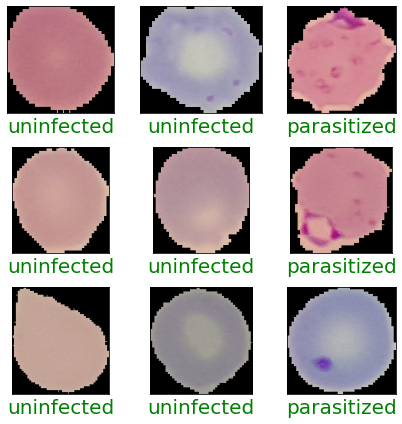

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for i, (image, label) in enumerate(dataset.take(9)):
        plt.subplot(3, 3, i + 1)
        plt.xticks([]); plt.yticks([])
        plt.imshow(image.numpy())
        plt.xlabel(info.features['label'].int2str(label), size=15, color='green')

plt.tight_layout()
plt.show()

In [68]:
print(dataset.keys())

dict_keys(['train'])
